# Contributors to this notebook

* Daniel Arribas-Bel [@darribas](http://twitter.com/darribas)
* Serge Rey [@sergerey](http://twitter.com/sergerey) 

In [1]:
%matplotlib inline
import pysal as ps  # 1.5 or higher
import numpy as np  # 1.7 or higher
import pandas as pd # 0.10 or higher
from matplotlib.pyplot import *

# Regular Lattice Weights 

The geography we are working with now is a simple lattice:

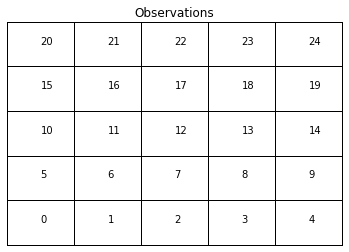

In [2]:
xs = np.array(list(range(5)) * 5).flatten()
ys = np.array([[i] * 5 for i in range(5)]).flatten()
f = figure()
ax = f.add_subplot(111)
scatter(xs, ys, marker='', color='k')
for i in range(5):
    axvline(i+0.5, color='k')
    axhline(i+0.5, color='k')
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.set_xlim((-0.5, 4.5))
ax.set_ylim((-0.5, 4.5))
for i in range(25):
    text(xs[i], ys[i], str(i))
title("Observations")

## Rook contiguity

To build a simple *rook* contiguity:

In [3]:
w = ps.lat2W(5, 5)

In [4]:
w?

`W` objects in `PySAL` have many attributes:

In [5]:
w.n

25

In [6]:
w.neighbors

{0: [5, 1],
 1: [0, 6, 2],
 2: [1, 7, 3],
 3: [2, 8, 4],
 4: [3, 9],
 5: [0, 10, 6],
 6: [1, 5, 11, 7],
 7: [2, 6, 12, 8],
 8: [3, 7, 13, 9],
 9: [4, 8, 14],
 10: [5, 15, 11],
 11: [6, 10, 16, 12],
 12: [7, 11, 17, 13],
 13: [8, 12, 18, 14],
 14: [9, 13, 19],
 15: [10, 20, 16],
 16: [11, 15, 21, 17],
 17: [12, 16, 22, 18],
 18: [13, 17, 23, 19],
 19: [14, 18, 24],
 20: [15, 21],
 21: [16, 20, 22],
 22: [17, 21, 23],
 23: [18, 22, 24],
 24: [19, 23]}

In [7]:
w.weights

{0: [1.0, 1.0],
 1: [1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0],
 5: [1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0],
 20: [1.0, 1.0],
 21: [1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0],
 24: [1.0, 1.0]}

In [8]:
w[0]

{1: 1.0, 5: 1.0}

$s_0 = \sum_i \sum_j w_{i,j}$

In [9]:
w.s0

80.0

In [10]:
w.histogram

[(2, 4), (3, 12), (4, 9)]

In [11]:
np.sum( [ c[0]*c[1] for c in w.histogram ] )

80

In [12]:
w.pct_nonzero

12.8

$\text{pct nonzero} = s_0 / n^2$

In [13]:
w.s0 / w.n**2

0.128

In [14]:
full, id_order = w.full()
full

array([[ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
      

In [15]:
id_order

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [16]:
w.sparse

<25x25 sparse matrix of type '<type 'numpy.float64'>'
	with 80 stored elements in Compressed Sparse Row format>

If we are working with very large datasets, we might want to create a sparse object directly to save up on memory:

In [17]:
ws = ps.weights.lat2SW(5, 5)
ws

<25x25 sparse matrix of type '<type 'numpy.int8'>'
	with 80 stored elements in Compressed Sparse Row format>

## Queen Contiguity

In [18]:
wq = ps.lat2W(5, 5, rook=False)

In [19]:
wq.s0

144.0

In [20]:
wq.histogram

[(3, 4), (4, 0), (5, 12), (6, 0), (7, 0), (8, 9)]

In [21]:
np.sum( [ c[0] * c[1] for c in wq.histogram ] )

144

In [22]:
wq.pct_nonzero

23.04

In [23]:
144. / wq.n**2

0.2304

## Bishop

In [24]:
wb = ps.w_difference(wq,w, constrained = False)

In [25]:
wb.n

25

In [26]:
wb.s0

64.0

In [27]:
wq[0]

{1: 1.0, 5: 1.0, 6: 1.0}

In [28]:
w[0]

{1: 1.0, 5: 1.0}

In [29]:
wb[0]

{6: 1.0}

In [30]:
ps.w_difference?

In [31]:
wb.histogram

[(1, 4), (2, 12), (3, 0), (4, 9)]

## Spatial Lag

$l_i = \sum_{i,j} w_{i,j} y_j$

In [32]:
y = np.random.randint(low=0, high=100, size=w.n) * 1.
y

array([ 37.,  10.,  47.,  10.,  89.,  34.,  75.,  89.,  43.,  37.,  73.,
        77.,  25.,  92.,  88.,  58.,  33.,  10.,  23.,  10.,  69.,  37.,
        97.,  80.,  75.])

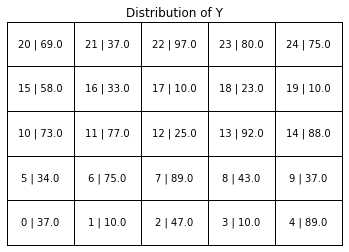

In [33]:
xs = np.array(list(range(5)) * 5).flatten()
ys = np.array([[i] * 5 for i in range(5)]).flatten()
f = figure()
ax = f.add_subplot(111)
scatter(xs, ys, marker='', color='k')
for i in range(5):
    axvline(i+0.5, color='k')
    axhline(i+0.5, color='k')
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.set_xlim((-0.5, 4.5))
ax.set_ylim((-0.5, 4.5))
for i in range(25):
    text(xs[i], ys[i], "%s | %s"%(str(i), y[i]), horizontalalignment='center',
         verticalalignment='center')
title('Distribution of Y')

In [34]:
wy = ps.lag_spatial(w,y)
wy

array([  44.,  159.,  109.,  179.,   47.,  185.,  210.,  190.,  228.,
        220.,  169.,  206.,  268.,  179.,  139.,  175.,  182.,  178.,
        192.,  186.,   95.,  199.,  127.,  195.,   90.])

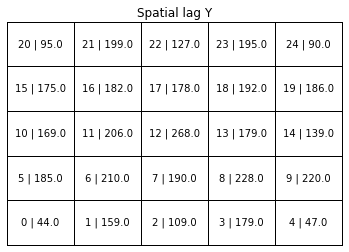

In [35]:
xs = np.array(list(range(5)) * 5).flatten()
ys = np.array([[i] * 5 for i in range(5)]).flatten()
f = figure()
ax = f.add_subplot(111)
scatter(xs, ys, marker='', color='k')
for i in range(5):
    axvline(i+0.5, color='k')
    axhline(i+0.5, color='k')
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.set_xlim((-0.5, 4.5))
ax.set_ylim((-0.5, 4.5))
for i in range(25):
    text(xs[i], ys[i], "%s | %s"%(str(i), wy[i]), horizontalalignment='center',
         verticalalignment='center')
title("Spatial lag Y")

In [36]:
w[0]

{1: 1.0, 5: 1.0}

In [37]:
y[[1,5]]

array([ 10.,  34.])

In [38]:
y *= 10

In [39]:
y

array([ 370.,  100.,  470.,  100.,  890.,  340.,  750.,  890.,  430.,
        370.,  730.,  770.,  250.,  920.,  880.,  580.,  330.,  100.,
        230.,  100.,  690.,  370.,  970.,  800.,  750.])

In [40]:
wy = ps.lag_spatial(w,y)

In [41]:
wy

array([  440.,  1590.,  1090.,  1790.,   470.,  1850.,  2100.,  1900.,
        2280.,  2200.,  1690.,  2060.,  2680.,  1790.,  1390.,  1750.,
        1820.,  1780.,  1920.,  1860.,   950.,  1990.,  1270.,  1950.,
         900.])

In [42]:
w[0]

{1: 1.0, 5: 1.0}

In [43]:
y[[1,5]]

array([ 100.,  340.])

In [44]:
y[[1,5]].sum()

440.0

In order to obtain averages around an observation, row standardize `W`:

${w}_{i,j}^* = w_{i,j} / \sum_j w_{i,j}$

In [45]:
print(w.transform)
w.transform = 'R'
print(w.transform)

O
R


In [46]:
w.weights

{0: [0.5, 0.5],
 1: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 2: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 3: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 4: [0.5, 0.5],
 5: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 6: [0.25, 0.25, 0.25, 0.25],
 7: [0.25, 0.25, 0.25, 0.25],
 8: [0.25, 0.25, 0.25, 0.25],
 9: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 10: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 11: [0.25, 0.25, 0.25, 0.25],
 12: [0.25, 0.25, 0.25, 0.25],
 13: [0.25, 0.25, 0.25, 0.25],
 14: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 15: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 16: [0.25, 0.25, 0.25, 0.25],
 17: [0.25, 0.25, 0.25, 0.25],
 18: [0.25, 0.25, 0.25, 0.25],
 19: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 20: [0.5, 0.5],
 21: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 22: [0.33

In [47]:
wry = ps.lag_spatial(w,y)

In [48]:
wry

array([ 220.        ,  530.        ,  363.33333333,  596.66666667,
        235.        ,  616.66666667,  525.        ,  475.        ,
        570.        ,  733.33333333,  563.33333333,  515.        ,
        670.        ,  447.5       ,  463.33333333,  583.33333333,
        455.        ,  445.        ,  480.        ,  620.        ,
        475.        ,  663.33333333,  423.33333333,  650.        ,  450.        ])

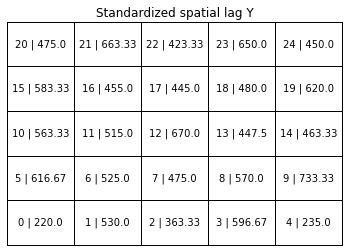

In [49]:
xs = np.array(list(range(5)) * 5).flatten()
ys = np.array([[i] * 5 for i in range(5)]).flatten()
f = figure()
ax = f.add_subplot(111)
scatter(xs, ys, marker='', color='k')
for i in range(5):
    axvline(i+0.5, color='k')
    axhline(i+0.5, color='k')
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.set_xlim((-0.5, 4.5))
ax.set_ylim((-0.5, 4.5))
for i in range(25):
    text(xs[i], ys[i], "%s | %s"%(str(i), np.round(wry[i], 2)), horizontalalignment='center',
         verticalalignment='center')
title("Standardized spatial lag Y")

In [50]:
w[24]

{19: 0.5, 23: 0.5}

In [51]:
y[[19,23]].mean()

450.0

# Weights From External Files

With these concepts in mind, let's apply them to real world data. We will revisit the neighborhood checkin dataset from Amsterdam.

## shapefiles

In [52]:
w_adam = ps.rook_from_shapefile('data/amsterdam_hoods.shp')

Island id:  [27]


In [53]:
w_adam.n

96

In [54]:
w_adam.pct_nonzero

5.121527777777778

In [55]:
wq_adam = ps.queen_from_shapefile('data/amsterdam_hoods.shp')

Island id:  [27]


In [56]:
wq_adam.pct_nonzero

5.620659722222222

In [57]:
w_adam.histogram

[(0, 1),
 (1, 2),
 (2, 6),
 (3, 8),
 (4, 23),
 (5, 22),
 (6, 14),
 (7, 13),
 (8, 6),
 (9, 1)]

In [58]:
wq_adam.histogram

[(0, 1),
 (1, 2),
 (2, 4),
 (3, 7),
 (4, 18),
 (5, 21),
 (6, 13),
 (7, 13),
 (8, 12),
 (9, 5)]

Let's visualize the cardinalities of both weight structures

In [59]:
wh = np.array(w_adam.histogram)

<Container object of 10 artists>

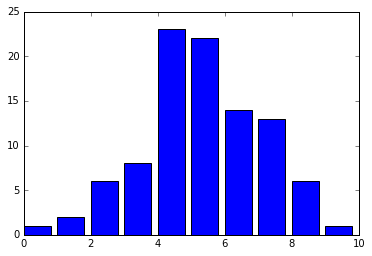

In [60]:
bar(wh[:,0],wh[:,1])

In [61]:
whq_adam = np.array(wq_adam.histogram)

<Container object of 10 artists>

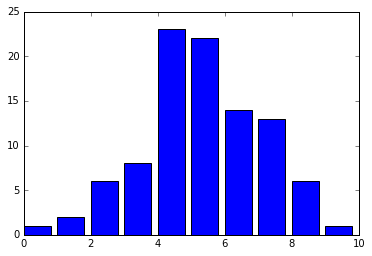

In [62]:
bar(wh[:,0],wh[:,1])

An alternative is to consider directly the number of neighbors every observation has, read it into a `pandas.Series` and plot a histogram/density kernel of it:

In [63]:
nn = pd.Series(list(wq_adam.cardinalities.values()))
nn

0     2
1     8
2     5
3     5
4     7
5     8
6     8
7     9
8     8
9     5
10    5
11    7
12    4
13    7
14    5
15    6
16    6
17    4
18    4
19    7
20    5
21    7
22    5
23    4
24    4
25    9
26    4
27    0
28    1
29    4
     ..
66    4
67    3
68    5
69    5
70    2
71    1
72    9
73    5
74    8
75    5
76    8
77    7
78    3
79    4
80    6
81    8
82    4
83    7
84    4
85    6
86    8
87    7
88    6
89    3
90    8
91    6
92    5
93    5
94    6
95    5
dtype: int64

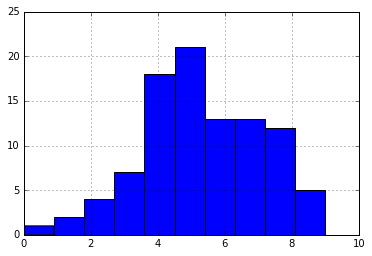

In [64]:
nn.hist()

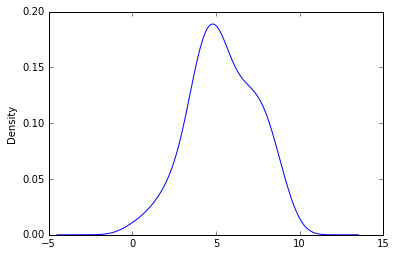

In [65]:
(nn * 1.).plot(kind='kde')

### Writing to files: GAL

In [66]:
adam_gal = ps.open("data/adam.gal",'w','gal')

In [67]:
adam_gal.write(wq_adam)

In [68]:
adam_gal.close()

We can look at the structure of the file by considering only the beginning of the file:

In [69]:
! head data/adam.gal

96
0 2
1 4
1 8
0 2 3 4 5 38 48 37
2 5
1 3 5 6 7
3 5
8 1 2 4 7
4 7


## Distance Based Weights

In [70]:
x,y = np.indices((5,5))

In [71]:
x.shape = (25,1)
y.shape = (25,1)
data = np.hstack([x,y])

In [72]:
data

array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [1, 0],
       [1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [2, 0],
       [2, 1],
       [2, 2],
       [2, 3],
       [2, 4],
       [3, 0],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [4, 0],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 4]])

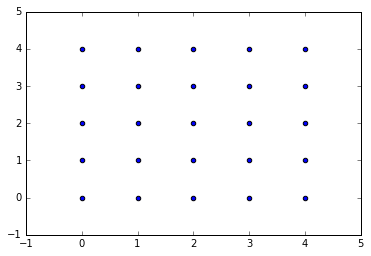

In [73]:
scatter(data[:, 0], data[:, 1])

### knn weights

In [74]:
tree = ps.cg.kdtree.KDTree(np.array(data))
wknn3 = ps.knnW(tree, k = 3)

In [75]:
wknn3[0]

{1: 1.0, 5: 1.0, 6: 1.0}

In [76]:
wknn3.histogram

[(3, 25)]

### Distance Bands

In [77]:
wdb = ps.threshold_binaryW_from_array(data, 2)

In [78]:
wdb[0]

{0: 1, 1: 1, 2: 1, 5: 1, 6: 1, 10: 1}

In [79]:
wdb.histogram

[(6, 4), (7, 0), (8, 8), (9, 4), (10, 0), (11, 4), (12, 4), (13, 1)]

In [80]:
wdb.cardinalities

{0: 6,
 1: 8,
 2: 9,
 3: 8,
 4: 6,
 5: 8,
 6: 11,
 7: 12,
 8: 11,
 9: 8,
 10: 9,
 11: 12,
 12: 13,
 13: 12,
 14: 9,
 15: 8,
 16: 11,
 17: 12,
 18: 11,
 19: 8,
 20: 6,
 21: 8,
 22: 9,
 23: 8,
 24: 6}

### Writing distance files

Distance weights are stored in a different format, the `gwt`. We will first create the `knn` `W` from our shapefile and then write it to a file.

In [81]:
adam_knn5 = ps.knnW_from_shapefile('data/amsterdam_hoods.shp', k=5)

In [82]:
adam_gwt = ps.open("data/adam.gwt",'w','gwt')
adam_gwt.write(adam_knn5)
adam_gwt.close()

In [83]:
! head 'data/adam.gwt'

0 96 Unknown Unknown
0 1      1
0 3      1
0 4      1
0 2      1
0 7      1
1 0      1
1 2      1
1 5      1
1 3      1
